# ADVERTISING DATA

#### Objective:-
Using the Advertising dataset we analyse the relationship between 'TV advertising', 'Radio advertising', 'Newspaper advertising' and 'sales' using a multiple linear regression model.

#### IMPORTING LIBRARIES



In [150]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### DATASET

In [151]:
# importing the data
data=pd.read_csv("C:\\Users\\hp\\Downloads\\advertising.csv")

# droping null values
data.dropna()

# displaying top 5 rows
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### DATA VISUALIZATION 

#### 1. Visualizing the effect of advertising mediums on Sales

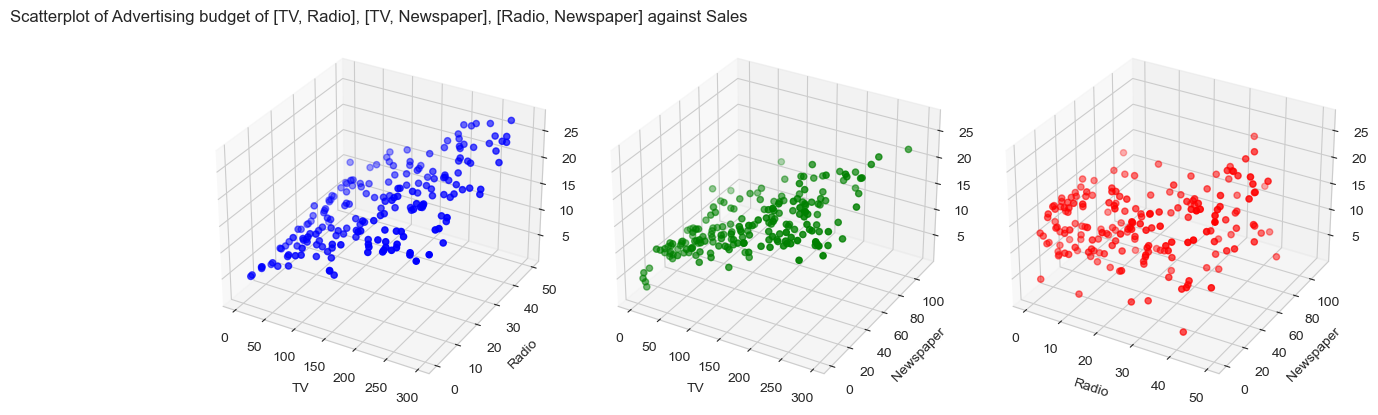

In [152]:

fig = plt.figure(figsize=(12, 4))

# Scatter plot 1: TV vs Radio vs Sales
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(data['TV'], data['Radio'], data['Sales'], c='blue', marker='o')
ax1.set_xlabel('TV')
ax1.set_ylabel('Radio')
ax1.set_zlabel('Sales')
ax1.set_title('Scatterplot of Advertising budget of [TV, Radio], [TV, Newspaper], [Radio, Newspaper] against Sales')

# Scatter plot 2: TV vs Newspaper vs Sales
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(data['TV'], data['Newspaper'], data['Sales'], c='green', marker='o')
ax2.set_xlabel('TV')
ax2.set_ylabel('Newspaper')
ax2.set_zlabel('Sales')


# Scatter plot 3: Radio vs Newspaper vs Sales
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(data['Radio'], data['Newspaper'], data['Sales'], c='red', marker='o')
ax3.set_xlabel('Radio')
ax3.set_ylabel('Newspaper')
ax3.set_zlabel('Sales')


# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

#### 2. Detecting outliers

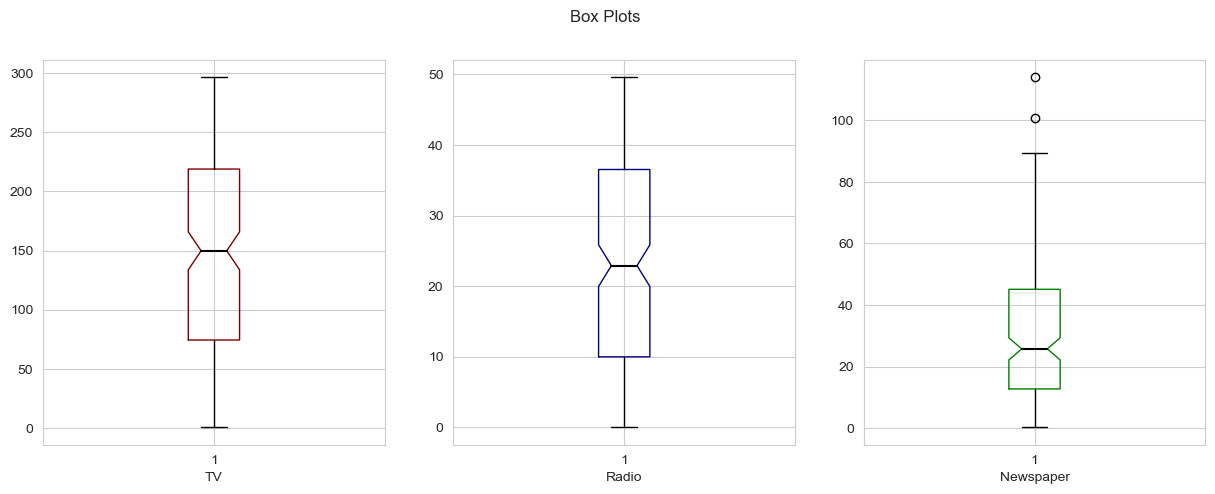

In [135]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
box_colors=['maroon','navy','green']
axs[0].boxplot(data['TV'], boxprops={'color': box_colors[0]},medianprops = dict(color = "black", linewidth = 1.5),notch=True)
axs[0].set_xlabel('TV')
axs[1].boxplot(data['Radio'], boxprops={'color': box_colors[1]},medianprops = dict(color = "black", linewidth = 1.5),notch=True)
axs[1].set_xlabel('Radio')
axs[2].boxplot(data['Newspaper'], boxprops={'color': box_colors[2]},medianprops = dict(color = "black", linewidth = 1.5),notch=True)
axs[2].set_xlabel('Newspaper')
plt.suptitle('Box Plots')
plt.grid(True)
plt.show()

**INTERPRETATON:** For TV the median of advertisement budget lies around 150 dollars while the  maximum allocated budget is 300 dollars. For Radio the median of advertisement budget lies around 25 dollars while the  maximum allocated budget is 50 dollars. For Newspaper the median of advertisement budget lies around 25 dollars while the  maximum allocated budget is more than 100 dollars which is an outlier.

#### TRAIN-TEST SPLIT:
We now split our dataset into training and testing sets. We perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [136]:
X = data[['TV','Radio','Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (160, 3) (160,)
Testing set shape: (40, 3) (40,)


#### MODEL: MULTIPLE LINER REGRESSION

Regression of Sales on
1) TV
2) Radio
3) Newspaper\
We ran multiple regression equations of “Sales” on the quantitative predictors.

In [153]:
# Add a constant term to the X_train matrix
X_train_with_constant = sm.add_constant(X_train)

# Create a linear regression model
lm = sm.OLS(y_train, X_train_with_constant)

# Fit the model
lm_results = lm.fit()

# Print the summary
print(lm_results.summary())

X_train_sm = sm.add_constant(X_train)
y_pred = lm_results.predict(X_train_sm)
Train_MSE=np.sqrt(mean_squared_error(y_train, y_pred))
RMSE=math.sqrt(Train_MSE)
print('Training MSE:',round(Train_MSE,2))
print('Training RSE:',round(RMSE,2))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           8.51e-78
Time:                        00:55:25   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7141      0.352     13.407      0.0

**Model:** Sales=β0+β1.TV+β2.Radio+β3.Newspaper+ε

**Hypothesis:** H0:β1=β2=β3\
From the p-value and the estimates of regression coefficients we can conclude although effects of advertising budget of TV and radio have a positive significant impact on sales but newspaper has a negetive impact on sales but is insignificant.

**1) For TV:** \
a. Regression Coefficient(β1):0.0545\
b. Standard Error(Se(βˆ1)):0.002\
c. t-statistic:34.972\
From the p-value we can say that allocating budget on advertisement through TV does have a significant positive impact on sales i.e allocting budget on advertisement through TV increases sales and thus we reject the null hypothesis H0:β=0 at 5% level of signifinace.                 

**2) For Radio:** \
a. Regression Coefficient(β2):0.1009\
b. Standard Error(Se(βˆ2)):0.010\
c. t-statistic:10.470\
From the p-value we can say that allocating budget on advertisement through Radio does have a significant positive impact on sales i.e allocting budget on advertisement through Radio increases sales and thus we reject the null hypothesis H0:β=0 at 5% level of signifinace.\

t-statistic gives the magnitude of importance\
t-statistic(TV)>t-statistic(Radio) i.e allocating more budget on TV has more impact on sales than advertising budget of Radio.\


Here F(obs)>F(0.01,3,196), so H0 is rejected at 1% level of significance.\

**Accuracy of the model:** \
We can see the RSE as 1.28. In other words, actual sales in each market deviate from the true regression line by approximately 1280 units on average. Now we see the value of R-squared statistic is 0.900  , which means 90% of the variablity in sales is explained by the multiple linear regression of sales on advertising budget of TV,Radio and newspaper. So we got relatively small RSE and R2 statistic close to 1. And hence can conclude the model is accurate.                    

#### MODEL DIAGNOSIS 

In [159]:
Residuals=lm_results.resid

#### 1. CHECKING NORMALITY OF ERRORS

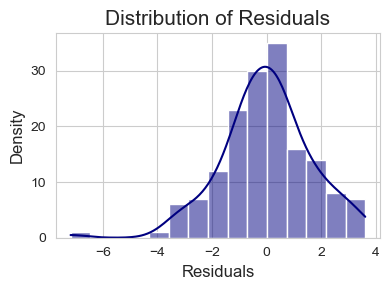

Shapiro-Wilk Test p-value: 0.01


In [160]:
sns.set_style("whitegrid")
# Create a figure and axes
fig, ax = plt.subplots(figsize=(4, 3))
# Plot the density of the error terms
sns.histplot(Residuals, kde=True, bins=15, color='navy', ax=ax)
# Set plot title and labels
ax.set_title('Distribution of Residuals', fontsize=15)
ax.set_xlabel('Residuals', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()
t_staistic,p_value=shapiro(Residuals)
print("Shapiro-Wilk Test p-value:", round(p_value,2))

Therefore from the plot and Shapiro-Wilk's test where p-value <0.05, it is evident that errors are non normal.

#### 2. CHECKING HOMOSCEDASTICITY

[('Lagrange multiplier statistic', 4.819772861945797), ('p-value', 0.18548006044883358), ('f-value', 1.61507811557856), ('f p-value', 0.1880970245604529)]


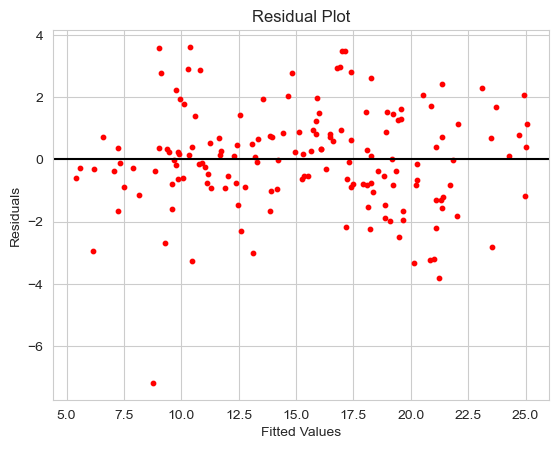

In [157]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test=sms.het_breuschpagan(Residuals,lm_results.model.exog)
L=lzip(names, test)
print(L)
Fitted_values=lm_results.fittedvalues
plt.scatter(Fitted_values,Residuals,s=10,color='red')
plt.axhline(y=0,color='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Conclusion:** \
From Breusch-Pagan test we see the p-value > 0.05, so we fail to reject the null hypothesis that errors are homoscedastic. Also from the residual plot it is evident that errors are homoscedastic.

#### 3.CHECKING AUTO-CORRELATION

Durbin-Watson Test Statistic:- 2.11


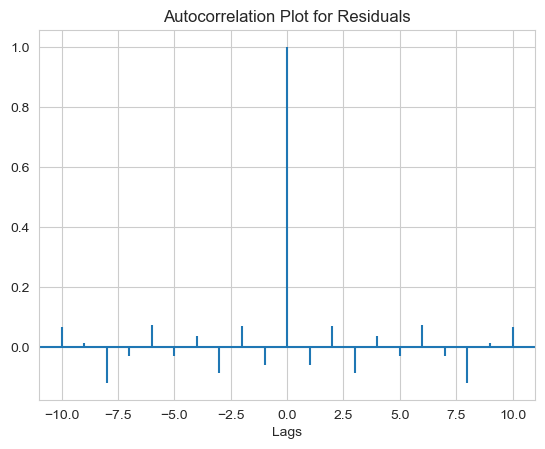

In [158]:
# Perform the Durbin-Watson test
durbin_watson_stat = durbin_watson(Residuals)
durbin_watson_stat=round(durbin_watson_stat,2)
print('Durbin-Watson Test Statistic:-',durbin_watson_stat)
plt.title("Autocorrelation Plot for Residuals")
plt.xlabel("Lags")
plt.acorr(Residuals, maxlags = 10)
plt.grid(True)
plt.show()

**Conclusion:** \
The test statistic is **2.11**. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model. From the autocorrelation plot the above can also be concluded.

#### 4.CHECKING MULTI-COLLINEARITY


Text(0.5, 1.0, 'Correlation Coefficient Of Predictors')

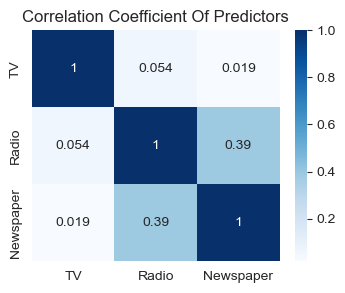

In [142]:
plt.figure(figsize=(4,3))
sns.heatmap(X_train.corr(), cmap="Blues", annot=True)
plt.title('Correlation Coefficient Of Predictors')

#### PREDICTION BASED ON TEST SET

In [107]:
X_test_sm = sm.add_constant(X_test)
y_pred = lm_results.predict(X_test_sm)
Test_MSE=np.sqrt(mean_squared_error(y_test, y_pred))
print('Test MSE:',round(Test_MSE,2))

Test MSE: 1.71


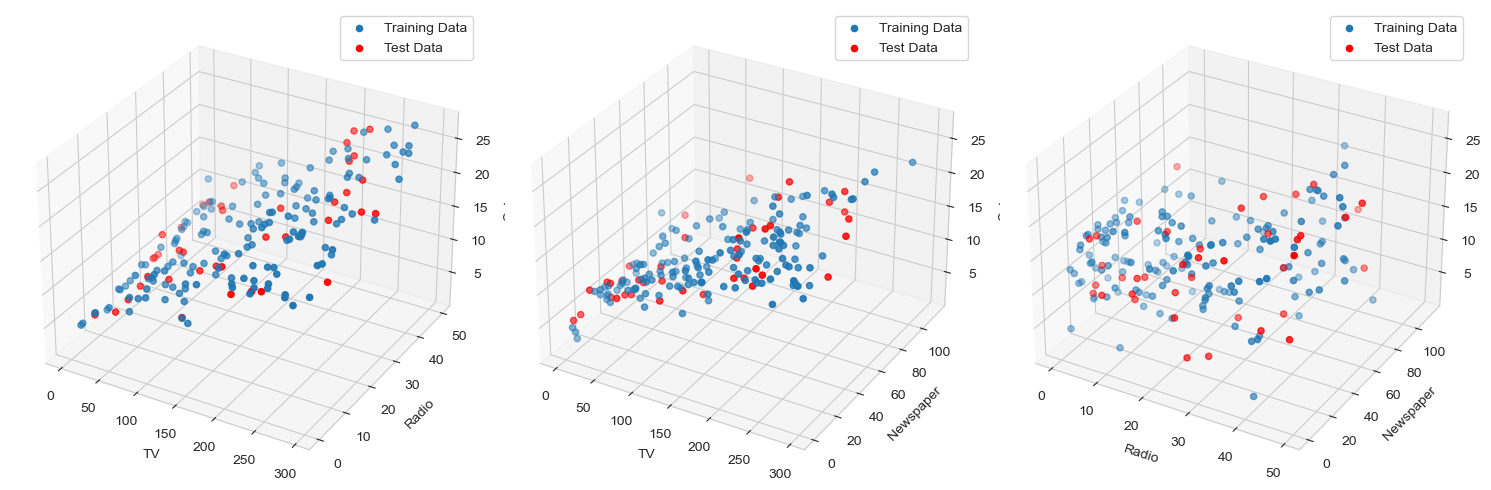

In [134]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_train['TV'], X_train['Radio'], y_train, marker='o',label='Training Data')
ax1.scatter(X_test['TV'], X_test['Radio'], y_test,color='red', marker='o',label='Test Data')
ax1.set_xlabel('TV')
ax1.set_ylabel('Radio')
ax1.set_zlabel('Sales')
ax1.legend()

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_train['TV'], X_train['Newspaper'], y_train, marker='o',label='Training Data')
ax2.scatter(X_test['TV'], X_test['Newspaper'], y_test,color='red', marker='o',label='Test Data')
ax2.legend()
ax2.set_xlabel('TV')
ax2.set_ylabel('Newspaper')
ax2.set_zlabel('Sales')


ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_train['Radio'], X_train['Newspaper'], y_train,  marker='o',label='Training Data')
ax3.scatter(X_test['Radio'], X_test['Newspaper'], y_test, color='red' , marker='o',label='Test Data')
ax3.set_xlabel('Radio')
ax3.set_ylabel('Newspaper')
ax3.set_zlabel('Sales')
ax3.legend()

plt.tight_layout()
plt.show()